In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("Financial Analytics data.csv")

In [19]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [20]:
data.shape

(488, 4)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [14]:
data = data.drop(['Unnamed: 4'], axis=1)

In [15]:
data.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

In [22]:
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,479.000000,365.000000
mean,251.508197,28043.857119,4395.976849
std,145.884078,59464.615831,11092.206185
min,1.000000,3017.070000,47.240000
25%,122.750000,4843.575000,593.740000
50%,252.500000,9885.050000,1278.300000
75%,378.250000,23549.900000,2840.750000
max,500.000000,583436.720000,110666.930000


In [23]:
df = data.interpolate(method = 'linear')

In [24]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [25]:
df.shape

(488, 4)

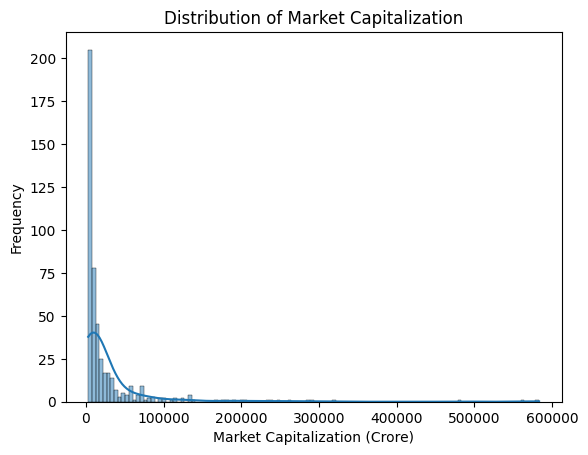

In [28]:
# Plot distribution of Market Capitalization
sns.histplot(data['Mar Cap - Crore'], kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')
plt.show()

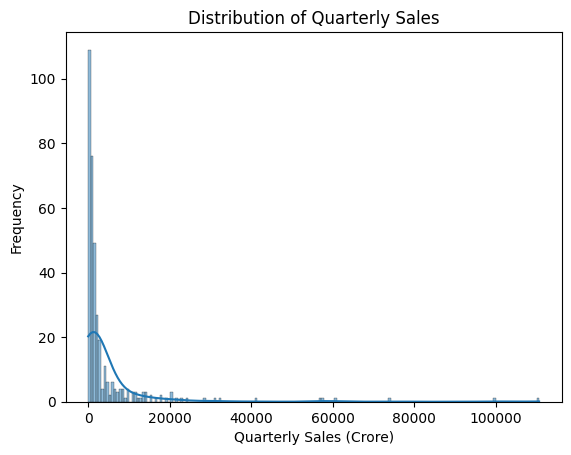

In [29]:
# Plot distribution of Quarterly Sales
sns.histplot(data['Sales Qtr - Crore'], kde=True)
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Frequency')
plt.show()

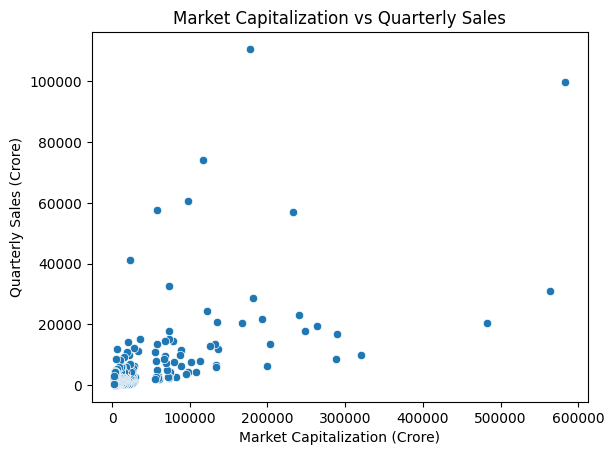

In [31]:
# Scatter plot to visualize the relationship between Market Cap and Quarterly Sales
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=data)
plt.title('Market Capitalization vs Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

In [32]:
correlation_matrix = data[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()

In [33]:
correlation_matrix

,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.620702
Sales Qtr - Crore,0.620702,1.000000


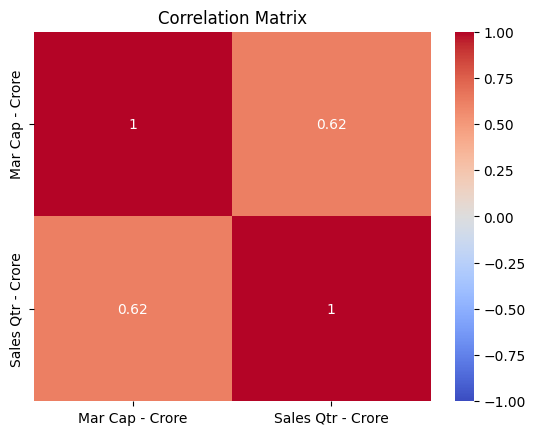

In [34]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# Identify top 10 companies by Market Capitalization
top_10_market_cap = data.nlargest(10, 'Mar Cap - Crore')
top_10_market_cap[['Name', 'Mar Cap - Crore']]


,Name,Mar Cap - Crore
0,Reliance Inds.,583436.72
1,TCS,563709.84
2,HDFC Bank,482953.59
3,ITC,320985.27
4,H D F C,289497.37
5,Hind. Unilever,288265.26
6,Maruti Suzuki,263493.81
7,Infosys,248320.35
8,O N G C,239981.50
9,St Bk of India,232763.33


In [36]:
top_10_sales_qtr = data.nlargest(10, 'Sales Qtr - Crore')
top_10_sales_qtr[['Name', 'Sales Qtr - Crore']]

,Name,Sales Qtr - Crore
14,I O C L,110666.93
0,Reliance Inds.,99810.00
23,Tata Motors,74156.07
27,B P C L,60616.36
54,H P C L,57474.25
9,St Bk of India,57014.08
122,Rajesh Exports,41304.84
40,Tata Steel,32464.14
1,TCS,30904.00
13,Larsen & Toubro,28747.45


In [37]:
# Identify companies with high market cap but low quarterly sales
high_cap_low_sales = data[(data['Mar Cap - Crore'] > data['Mar Cap - Crore'].mean()) & 
                          (data['Sales Qtr - Crore'] < data['Sales Qtr - Crore'].mean())]
print("Companies with High Market Cap but Low Quarterly Sales:\n", high_cap_low_sales[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore']])


Companies with High Market Cap but Low Quarterly Sales:
                  Name  Mar Cap - Crore  Sales Qtr - Crore
25       Asian Paints        108044.04            4260.52
28      IndusInd Bank         97379.96            4286.78
29         Bajaj Fin.         94476.77            3540.63
33        Adani Ports         81781.89            2688.85
36      Avenue Super.         74066.35            4094.82
37      Titan Company         73886.00            4274.84
41      Eicher Motors         73311.41            2269.01
42       Nestle India         73015.49            2601.46
43    Godrej Consumer         71859.82            2630.30
50        Dabur India         60015.00            1966.44
51              Bosch         59204.28            3071.92
52       Shree Cement         58987.08            2296.23
56    Britannia Inds.         56837.20            2567.48
59   Zee Entertainmen         54817.89            1838.07
100  L&T Fin.Holdings         28932.43            2630.17
102          NH

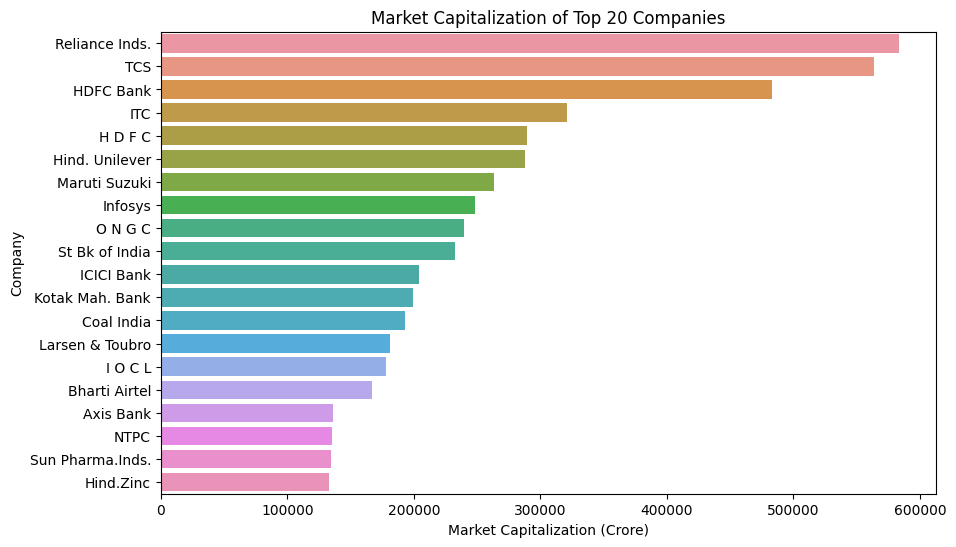

In [41]:
# Visualize the distribution of market capitalization among the top 50 companies
top_50_market_cap = data.nlargest(20, 'Mar Cap - Crore')
plt.figure(figsize=(10, 6))
sns.barplot(x='Mar Cap - Crore', y='Name', data=top_50_market_cap)
plt.title('Market Capitalization of Top 20 Companies')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Company')
plt.show()


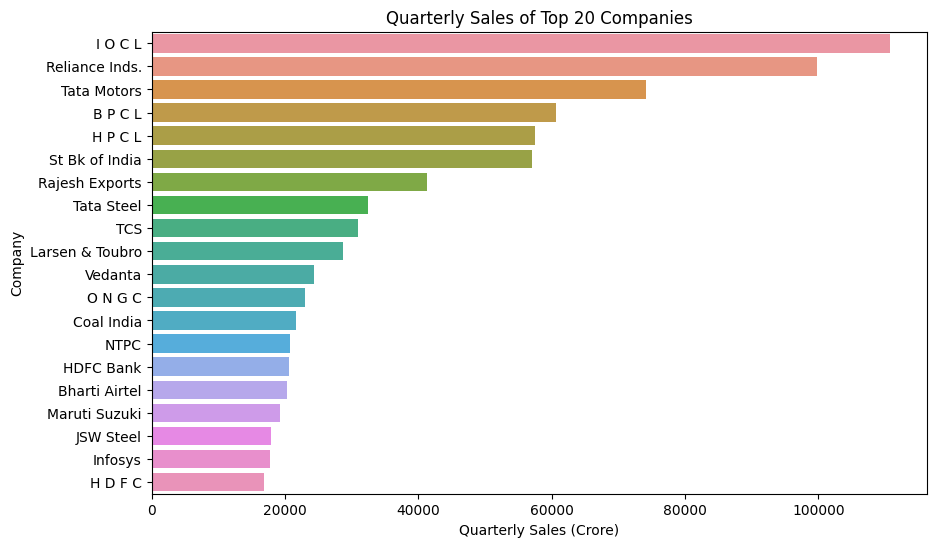

In [42]:
# Visualize the distribution of quarterly sales among the top 50 companies
top_50_sales_qtr = data.nlargest(20, 'Sales Qtr - Crore')
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Qtr - Crore', y='Name', data=top_50_sales_qtr)
plt.title('Quarterly Sales of Top 20 Companies')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Company')
plt.show()

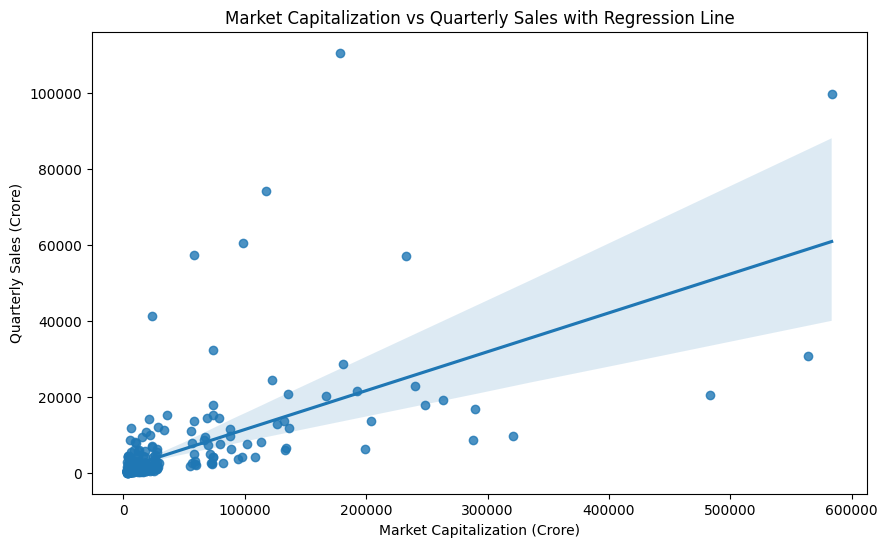

In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=data)
plt.title('Market Capitalization vs Quarterly Sales with Regression Line')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

In [45]:
top_10_market_cap = data.nlargest(10, 'Mar Cap - Crore')
top_10_sales_qtr = data.nlargest(10, 'Sales Qtr - Crore')

Text(0, 0.5, 'Company')

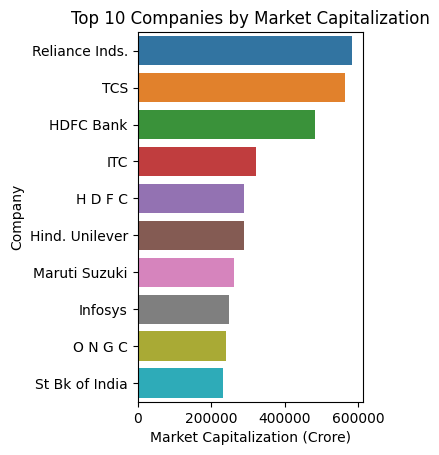

In [46]:
# Plot top 10 by Market Cap
plt.subplot(1, 2, 1)
sns.barplot(x='Mar Cap - Crore', y='Name', data=top_10_market_cap)
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Company')

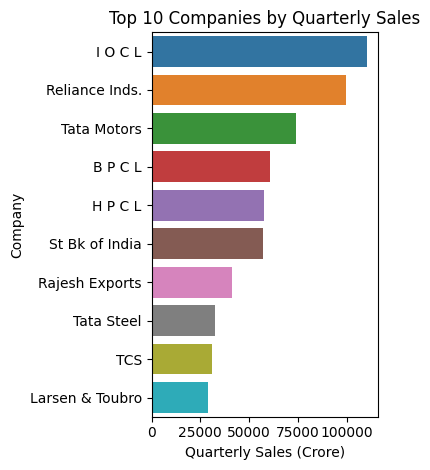

In [48]:
# Plot top 10 by Quarterly Sales
plt.subplot(1, 2, 2)
sns.barplot(x='Sales Qtr - Crore', y='Name', data=top_10_sales_qtr)
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Company')

plt.tight_layout()
plt.show()